In [149]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим dataset:

In [59]:
data = pd.read_csv('adult.csv')

Познакомимся с данными:

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [10]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
data.describe(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


Посмотрим на целевую переменную:

In [9]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Целевая переменная принимает только 2 значения.

Удалим некоторые признаки:

In [16]:
data.drop(['fnlwgt', 'educational-num'], axis = 1, inplace = True)

В данных как бы нет пропущенных значений, но как бы есть...

In [26]:
data['workclass'].value_counts().to_frame()

,workclass
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [24]:
data['marital-status'].value_counts().to_frame()

,marital-status
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [25]:
data['occupation'].value_counts().to_frame()

,occupation
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355
Handlers-cleaners,2072


In [27]:
data['relationship'].value_counts().to_frame()

,relationship
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [28]:
data['race'].value_counts().to_frame()

,race
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [29]:
data['gender'].value_counts().to_frame()

,gender
Male,32650
Female,16192


In [32]:
data['native-country'].value_counts().to_frame()

,native-country
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


Итак, в трех переменных есть пропущенные значения. Drop them!

In [60]:
data = data[(data['workclass'] != '?') & (data['occupation'] != '?') & (data['native-country'] != '?')]

In [61]:
data = data.reset_index()

Отдельно поработаем с категориальными и числовыми переменными. Числовые - отнормируем. Категориальные - преобразуем

Категориальные переменные - LabelEncoder

In [62]:
label_enc = LabelEncoder()

Для переменной workclass:

In [64]:
label_workclass = label_enc.fit_transform(data['workclass'])
label_workclass = pd.DataFrame(label_workclass, columns = ['workclass'])

Для переменной education:

In [65]:
label_education = label_enc.fit_transform(data['education'])
label_education = pd.DataFrame(label_education, columns = ['education'])

Для переменной marital-status:

In [66]:
label_marital_status = label_enc.fit_transform(data['marital-status'])
label_marital_status = pd.DataFrame(label_marital_status, columns = ['marital-status'])

Для переменной occupation:

In [67]:
label_occupation = label_enc.fit_transform(data['occupation'])
label_occupation = pd.DataFrame(label_occupation, columns = ['occupation'])

Для переменной relationship:

In [68]:
label_relationship = label_enc.fit_transform(data['relationship'])
label_relationship = pd.DataFrame(label_relationship, columns = ['relationship'])

Для переменной race:

In [69]:
label_race = label_enc.fit_transform(data['race'])
label_race = pd.DataFrame(label_race, columns = ['race'])

Для переменной gender:

In [70]:
label_gender = label_enc.fit_transform(data['gender'])
label_gender = pd.DataFrame(label_gender, columns = ['gender'])

Для переменной native-country:

In [71]:
label_native_country = label_enc.fit_transform(data['native-country'])
label_native_country = pd.DataFrame(label_native_country, columns = ['native-country'])

Для переменной income:

In [87]:
label_income = label_enc.fit_transform(data['income'])
label_income = pd.DataFrame(label_income, columns = ['income'])

Числовые переменные - произведем нормировку "min-max":

In [73]:
numerical = data[['age', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [74]:
mm_scaler = MinMaxScaler()
mm_scaled_var = mm_scaler.fit_transform(numerical)
mm_scaled_var = pd.DataFrame(mm_scaled_var, columns = numerical.columns)
mm_scaled_var.head(5)

,age,capital-gain,capital-loss,hours-per-week
0,0.109589,0.000000,0.0,0.397959
1,0.287671,0.000000,0.0,0.500000
2,0.150685,0.000000,0.0,0.397959
3,0.369863,0.076881,0.0,0.397959
4,0.232877,0.000000,0.0,0.295918


Объединим все в один dataframe:

In [75]:
new_data = mm_scaled_var.join(label_workclass)
new_data = new_data.join(label_education)
new_data = new_data.join(label_marital_status)
new_data = new_data.join(label_occupation)
new_data = new_data.join(label_relationship)
new_data = new_data.join(label_race)
new_data = new_data.join(label_gender)
new_data = new_data.join(label_native_country )

In [76]:
new_data.head()

,age,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,0.109589,0.000000,0.0,0.397959,2,1,4,6,3,2,1,38
1,0.287671,0.000000,0.0,0.500000,2,11,2,4,0,4,1,38
2,0.150685,0.000000,0.0,0.397959,1,7,2,10,0,4,1,38
3,0.369863,0.076881,0.0,0.397959,2,15,2,6,0,2,1,38
4,0.232877,0.000000,0.0,0.295918,2,0,4,7,1,4,1,38


Разделим выборку на обучающую и тестовую:

In [81]:
X = new_data

In [106]:
label_income.values[0][ : ]

array([0])

In [107]:
y = label_income.values.ravel()

In [108]:
rand_state = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

Настало время обучения

Логистическая регрессия

In [127]:
reg_model = LogisticRegression(max_iter = 500)

In [128]:
# обучаем модель
reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [129]:
predictions = reg_model.predict_proba(X_test)

In [130]:
reg_model.score(X_test, y_test)

0.7966832504145936

SVM

In [136]:
svm_model = svm.SVC()

In [137]:
svm_model.fit(X_train, y_train)

SVC()

In [138]:
svm_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
svm_model.score(X_test, y_test)

0.7522388059701492

Мммм, с каждым разом все лучше...

Попробуем деревья

In [157]:
ros = RandomOverSampler(random_state = 0)

In [158]:
ros.fit(X, y)
x_resampled, y_resampled = ros.fit_sample(X, y)
print('Количество элементов до операции:', len(X))
print('Количество элементов после операции:', len(x_resampled))

Количество элементов до операции: 45222
Количество элементов после операции: 68028


In [159]:
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [160]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
rfc_model = RandomForestClassifier(n_estimators = 100)

# обучаем модель
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

Наиболее важные атрибуты для модели Random Forest:

No handles with labels found to put in legend.


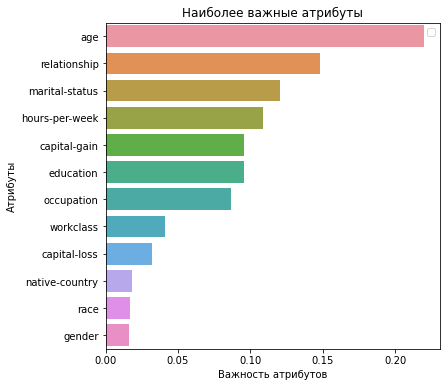

In [154]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,
                        index = headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize = (6, 6))
sns.barplot(x = feature_imp, y = feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Посчитаем качество модели - classification report:

In [161]:
model_pred = rfc_model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      6785
           1       0.88      0.96      0.92      6821

    accuracy                           0.91     13606
   macro avg       0.92      0.91      0.91     13606
weighted avg       0.92      0.91      0.91     13606



0.9610465970895193

Воот, теперь другое дело